![Pic](AuthorshipTitle.png)


## Background
We often say that the United States of America was founded in 1776 with the Declaration of Independence.  Even after the revolutionary war however, it was still unclear whether the former British colonies would be united as a single nation with a strong national government or more loosely connected as a confederation of sovereign states.   

In the late 1780s, the US Constitution was written but still needed to be ratified by all 13 states.    The "Federalist Papers" were an important series of 85 essays written in support of constitutional ratification.  At the time, the true authors of the essays was unknown because they were published under the name "PUBLIUS."  Later on, it became known that James Madison, John Jay, and Alexander Hamilton wrote the essays.   All of the essays were claimed by one of the authors, but 12 of them were claimed by both Madison and Hamilton and the disputed authorship remained unresolved until the 1960s.

In 1963,  Mosteller and Wallace used a Bayesian approach to analyze word counts and determine authorship of the 12 disputed papers.  In this notebook, we will recreate part of their analysis using modern Python tools. Our primary goal is to learn some common python tools for data analysis and to apply conjugate Bayesian inference techniques.

The techniques used by Mosteller and Wallace are quite simplistic compared to modern techniques in Natural Language Processing (NLP).  While they are an interesting application of Bayes' rule and are surprising powerful in this context, I would encourage you to check out some of [these tutorials from Kaggle](https://www.kaggle.com/learn/natural-language-processing) if you are interested in a more comtemporary view of NLP.

## References
1. [Software Carpentries Pandas Lesson](http://swcarpentry.github.io/python-novice-gapminder/08-data-frames/index.html)
2. [Federalist Papers on Project Gutenberg](http://www.gutenberg.org/cache/epub/18/pg18.txt)
3. [Mosteller and Wallace](https://www.jstor.org/stable/pdf/2283270.pdf?refreqid=excelsior%3A848ccbeffeb905fd3fde6c1140a06bf7)

## The Data

Trick: use `shift+tab` when your cursor is on a function to get details about the arguments.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('PaperWordCounts.csv')

In [3]:
df.head()

,Author,from_count,by_count,Length,upon_count,to_count,ID
0,HAMILTON,11,14,1583,6,71,1
1,JAY,4,10,1662,1,64,2
2,JAY,15,18,1438,0,63,3
3,JAY,7,16,1626,0,67,4
4,JAY,10,10,1337,0,50,5


In [4]:
df['Length']

0     1583
1     1662
2     1438
3     1626
4     1337
      ... 
80    3781
81    1532
82    5705
83    3925
84    2657
Name: Length, Length: 85, dtype: int64

In [5]:
df.iloc[0]

Author        HAMILTON
from_count          11
by_count            14
Length            1583
upon_count           6
to_count            71
ID                   1
Name: 0, dtype: object

In [6]:
df['Length'].iloc[0]

1583

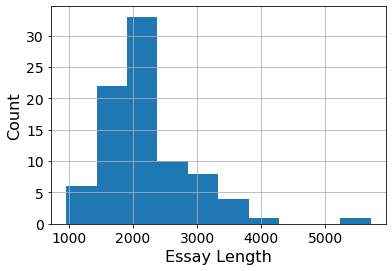

In [11]:
# Use Pandas to make a histogram of the essay lengths
df['Length'].hist()

# Set the x and ylabels
plt.xlabel('Essay Length', fontsize=16)
plt.ylabel('Count', fontsize=16)

# Increase the fontsize of the tick labels
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [19]:
madison_papers = df.loc[ df['Author']=='MADISON' ]

madison_papers.head()

,Author,from_count,by_count,Length,upon_count,to_count,ID
9,MADISON,10,36,2994,0,125,10
13,MADISON,11,18,2136,0,80,14
35,MADISON,19,30,2737,1,100,36
36,MADISON,19,36,3315,4,141,37
37,MADISON,22,33,2604,0,102,38


In [20]:
hamilton_papers = df.loc[ df['Author']=='HAMILTON' ]
hamilton_papers.head()

,Author,from_count,by_count,Length,upon_count,to_count,ID
0,HAMILTON,11,14,1583,6,71,1
5,HAMILTON,13,10,1938,4,69,6
6,HAMILTON,10,29,2250,11,99,7
7,HAMILTON,9,11,1986,3,100,8
8,HAMILTON,6,13,1974,4,82,9


## Formulation
Working towards the authorship question, we will first attempt to model the word counts used in known Hamilton essays compared to the word counts used in known Madison essays.  In particular, we will look at the number of "upon" counts per 200 words.  Count data like this is commonly modeled using a Poisson random variable, which is what we'll use here.  The Poisson PMF has a single parameter $\lambda$ and takes the form:

$$
m(k | \lambda) = \frac{\lambda^k e^{-\lambda}}{k!}
$$

The variable $k$ here represents the number of counts of a particular word in a segment of text that is 200 characters long and the parameter $\lambda$ represents the averate number of word occurences expected.  Of course we don't actually know $\lambda$ and our goal here is to infer it from the federalist papers text.

#### Constructing the prior

Here we will use a Gamma prior distribution on $\lambda$.  The Gamma distribution is defined for $\lambda\in[0,\infty)$ and has a density of form

$$
f(\lambda) = \frac{1}{\Gamma(k)\theta^k} x^{k-1} e^{-\frac{x}{\theta}}
$$




#### Reading the Data
This count data has already been generated by the `CreateCSV.py` script and is stored in three different CSV files: "HamiltonWordCounts.csv", "JayWordCounts.csv", and "MadisonWordCounts.csv".   We will read these files using Pandas.

In [24]:
jay_df = pd.read_csv('JayWordCounts.csv')
mad_df = pd.read_csv('MadisonWordCounts.csv')
ham_df = pd.read_csv('HamiltonWordCounts.csv')

In [25]:
jay_df.head()

,upon,to,from,by
0,1,78,8,10
1,0,84,15,29
2,0,72,13,13


In [26]:
mad_df.head()

,upon,to,from,by
0,0,85,9,23
1,0,74,9,22
2,1,81,7,18
3,0,67,15,23
4,2,74,13,24


In [27]:
ham_df.head()

,upon,to,from,by
0,7,82,14,15
1,6,77,11,14
2,8,88,9,24
3,3,101,11,13
4,4,80,5,11
